# Definizione del Problema
L'analisi che vogliamo effettuare è una analisi di clustering dell'andamento della corsa, identificando specificamente fasi quali:
- riscaldamento,
- ripetute in salita,
- allenamento a ritmo alto.

Per identificare queste fasi dell'allenamento andremo ad applicare tecniche di clustering.

Procediamo ora con la lettura dei file.

In [1]:
import pandas as pd

# Caricamento dei dataset
file_path_1 = 'https://raw.githubusercontent.com/aleqrt/pcto/main/notebook/Corsa Lenta Ursano 14_03_2024_2.xlsx'
file_path_2 = 'https://raw.githubusercontent.com/aleqrt/pcto/main/notebook/Ripetute in salita e 2000 Ursano 14_03_24_2.xlsx'

# Lettura dei file Excel
df_corsa_lenta = pd.read_excel(file_path_1)
df_ripetute_salita = pd.read_excel(file_path_2)

# Visualizzazione delle prime righe di ciascun dataset per comprenderne la struttura
(df_corsa_lenta.head(), df_ripetute_salita.head())


(    Timestamp  Power (w/kg)  Form Power (w/kg)  Air Power (w/kg)  Power (w)  \
 0  1710429678      0.000000           0.000000          0.000000        0.0   
 1  1710429679      1.750000           0.000000          0.000000       98.0   
 2  1710429680      2.178571           0.589286          0.000000      122.0   
 3  1710429681      2.750000           0.642857          0.017857      154.0   
 4  1710429682      3.428571           0.696429          0.035714      192.0   
 
    Form Power (w)  Air Power (w)  Watch Speed (m/s)  Stryd Speed (m/s)  \
 0             0.0            0.0              0.000            0.00000   
 1             0.0            0.0              1.638            0.00000   
 2            33.0            0.0              2.011            1.81250   
 3            36.0            1.0              2.487            2.25586   
 4            39.0            2.0              2.994            2.69922   
 
    Watch Distance (meters)  Stryd Distance (meters)  Stiffness  S

# Analisi descrittiva
Procediamo ora con un'analisi descrittiva di entrambi i dataset per ottenere una comprensione più approfondita delle caratteristiche dei dati, come il numero di osservazioni, la media, lo standard deviation, e altri parametri statistici di base. Questo ci aiuterà a definire meglio il problema e a pianificare le fasi successive dell'analisi.

In [2]:
# Analisi descrittiva dei dati per entrambi i dataset
desc_corsa_lenta = df_corsa_lenta.describe()
desc_corsa_lenta

,Timestamp,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Power (w),Form Power (w),Air Power (w),Watch Speed (m/s),Stryd Speed (m/s),Watch Distance (meters),Stryd Distance (meters),Stiffness,Stiffness/kg,Ground Time (ms),Cadence (spm),Vertical Oscillation (cm),Watch Elevation (m),Stryd Elevation (m)
count,1.921000e+03,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,1.710431e+09,6.723470,1.475943,0.153380,376.514315,82.652785,8.589276,4.599847,4.522288,4379.091461,4347.248829,12.826053,0.229037,195.856845,186.087454,7.179087,249.300056,188.922246
std,5.546893e+02,0.528178,0.073707,0.095811,29.577968,4.127613,5.365420,0.328078,0.336224,2574.183449,2539.577837,0.728333,0.013006,25.948804,6.411306,0.536333,4.014349,3.957085
min,1.710430e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.600010,182.130000
25%,1.710430e+09,6.428571,1.464286,0.071429,360.000000,82.000000,4.000000,4.434000,4.335940,2135.899900,2130.000000,12.709350,0.226953,190.000000,184.000000,7.009380,245.600010,185.770000
50%,1.710431e+09,6.750000,1.482143,0.142857,378.000000,83.000000,8.000000,4.607000,4.535160,4301.000000,4275.000000,12.861910,0.229677,194.000000,186.000000,7.195400,248.600010,188.780000
75%,1.710431e+09,7.000000,1.500000,0.214286,392.000000,84.000000,12.000000,4.792000,4.744140,6599.299800,6533.000000,13.000050,0.232144,200.000000,188.000000,7.366270,252.600010,191.730000
max,1.710432e+09,8.321429,1.553571,0.500000,466.000000,87.000000,28.000000,5.255000,5.128910,8872.200200,8800.000000,14.398360,0.257114,864.000000,204.000000,13.503720,258.399990,198.220000


In [3]:
desc_ripetute_salita = df_ripetute_salita.describe()
desc_ripetute_salita

,Timestamp,Power (w/kg),Form Power (w/kg),Air Power (w/kg),Power (w),Form Power (w),Air Power (w),Watch Speed (m/s),Stryd Speed (m/s),Watch Distance (meters),Stryd Distance (meters),Stiffness,Stiffness/kg,Ground Time (ms),Cadence (spm),Vertical Oscillation (cm),Watch Elevation (m),Stryd Elevation (m)
count,1.691000e+03,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,1.710434e+09,5.165730,1.101974,0.090468,289.280899,61.710526,5.066233,3.371939,3.365387,2562.848606,3537.136014,9.134995,0.163125,365.902425,160.901242,4.863609,241.405792,187.512229
std,4.882940e+02,3.329758,0.468295,0.088274,186.466460,26.224526,4.943323,2.034249,1.895222,1527.969377,1536.021362,6.072426,0.108436,328.653564,62.139690,3.412904,5.170327,5.238919
min,1.710433e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.399990,179.840000
25%,1.710434e+09,2.428571,0.678571,0.000000,136.000000,38.000000,0.000000,1.520000,1.566410,1270.099975,2235.250000,0.000000,0.000000,164.000000,124.000000,0.000000,237.200000,182.510000
50%,1.710434e+09,4.321429,1.375000,0.071429,242.000000,77.000000,4.000000,3.089000,3.156250,2566.300050,3561.000000,13.079190,0.233557,234.000000,172.000000,5.994140,239.200000,186.065000
75%,1.710434e+09,8.071429,1.446429,0.142857,452.000000,81.000000,8.000000,5.478000,5.507810,3572.899900,4591.000000,13.629870,0.243391,420.000000,208.000000,7.539685,246.200000,192.625000
max,1.710435e+09,11.964286,1.696429,0.428571,670.000000,95.000000,24.000000,6.481000,6.296880,5671.399900,6593.000000,15.685570,0.280099,1738.000000,238.000000,20.029380,250.200000,197.000000


- Dataset "Corsa Lenta"
    - Potenza (Power), Velocità (Speed), Distanza (Distance) e altre misure relative alla performance sono presenti, con varianze che suggeriscono diversi livelli di intensità durante la corsa.
    - Cadence (spm), Ground Time (ms), e Vertical Oscillation (cm) offrono informazioni sullo stile e l'efficienza di corsa.
- Dataset "Ripetute in Salita e 2000"
    - Contiene misure simili, ma con medie e deviazioni standard che possono riflettere diversi tipi di sforzo, come previsto dal contesto dell'allenamento in salita versus corsa lenta.

# Visualizzazione dei dati

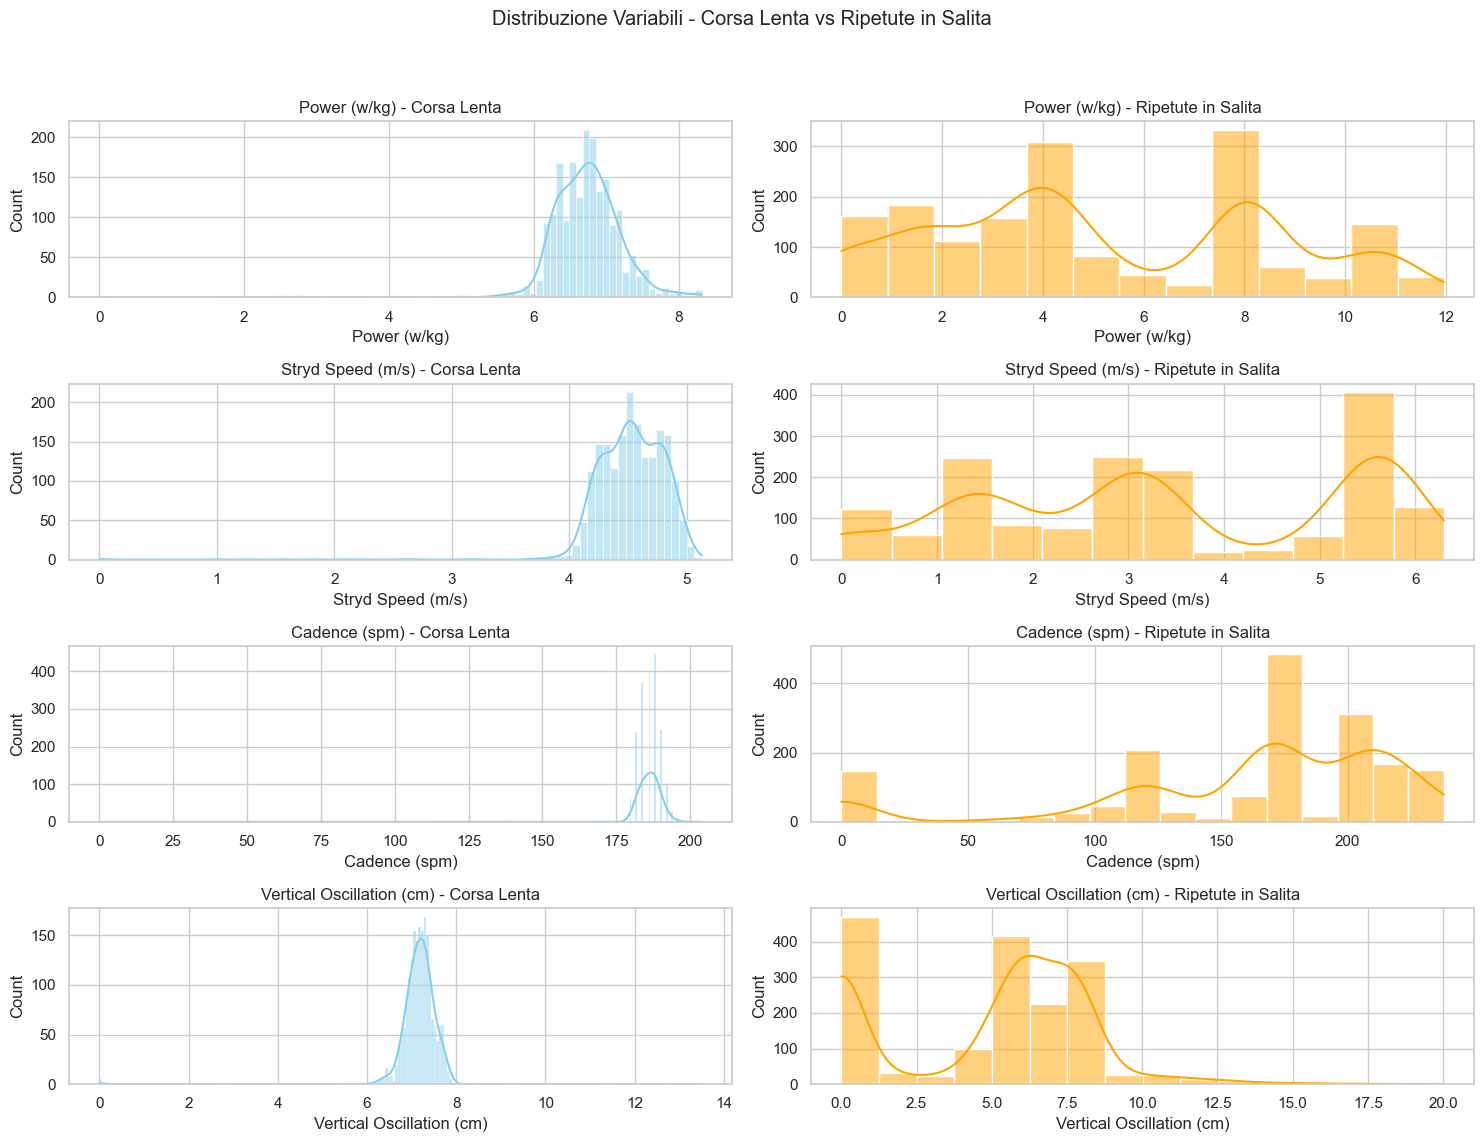

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni per i grafici
sns.set(style="whitegrid")

# Selezioniamo alcune variabili chiave per la visualizzazione
key_variables = ['Power (w/kg)', 'Stryd Speed (m/s)', 'Cadence (spm)', 'Vertical Oscillation (cm)']

# Creazione di istogrammi per il dataset "Corsa Lenta"
fig, axs = plt.subplots(len(key_variables), 2, figsize=(15, 12))
fig.suptitle('Distribuzione Variabili - Corsa Lenta vs Ripetute in Salita')

for i, var in enumerate(key_variables):
    sns.histplot(df_corsa_lenta[var], ax=axs[i, 0], kde=True, color='skyblue')
    axs[i, 0].set_title(var + " - Corsa Lenta")
    sns.histplot(df_ripetute_salita[var], ax=axs[i, 1], kde=True, color='orange')
    axs[i, 1].set_title(var + " - Ripetute in Salita")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Gli istogrammi mostrano le distribuzioni delle variabili chiave per entrambi i dataset, evidenziando come le caratteristiche della corsa variano tra la sessione di corsa lenta e quella di ripetute in salita:

- La potenza tende ad avere una distribuzione più ampia nelle ripetute in salita, indicando variazioni maggiori nello sforzo.
- La velocità Stryd mostra anch'essa differenze significative, con le ripetute in salita che presentano una gamma più estesa di velocità, riflettendo le variazioni di intensità dell'allenamento.
- La cadenza e l'oscillazione verticale variano tra le due tipologie di corsa, con distribuzioni che suggeriscono differenze nelle tecniche di corsa adottate dall'atleta.

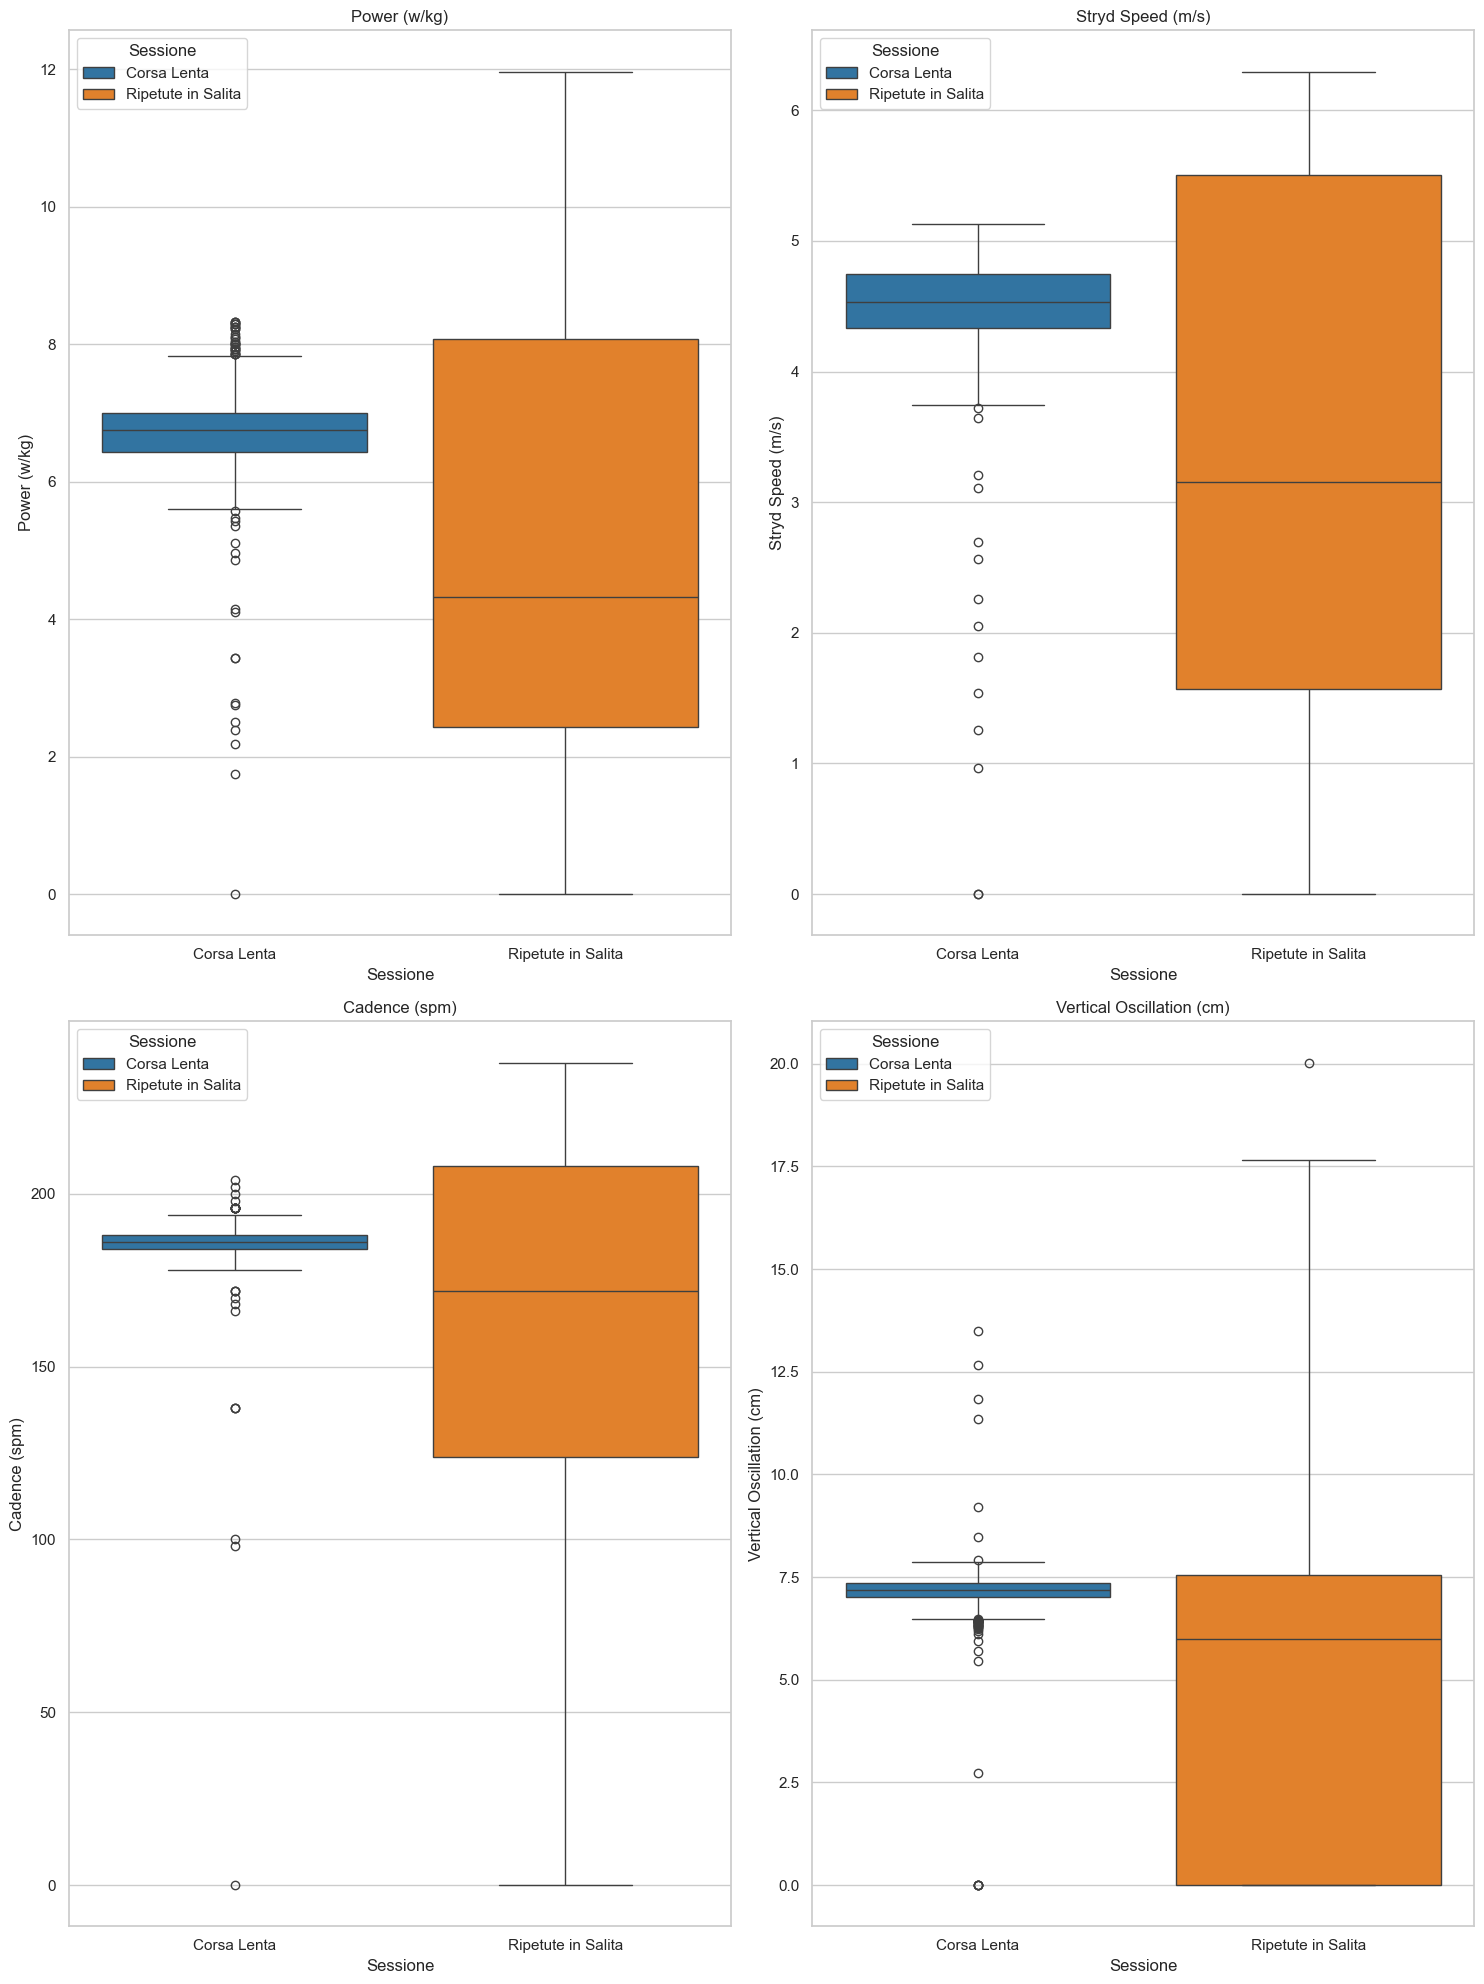

In [5]:
# Aggiunta di una colonna 'Sessione' per etichettare le osservazioni in entrambi i dataset
df_corsa_lenta['Sessione'] = 'Corsa Lenta'
df_ripetute_salita['Sessione'] = 'Ripetute in Salita'

# Unione dei due dataset con la nuova colonna
df_combined_labeled = pd.concat([df_corsa_lenta[key_variables + ['Sessione']], 
                                 df_ripetute_salita[key_variables + ['Sessione']]])
# Creazione dei boxplot affiancati per ogni variabile con colori distinti per ogni sessione

plt.figure(figsize=(15, 20))
for i, var in enumerate(key_variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Sessione', y=var, data=df_combined_labeled, hue='Sessione', palette=["#1f77b4", "#ff7f0e"], legend=True)
    plt.title(var)

plt.tight_layout()
plt.show()

I boxplot evidenziano le differenze nella distribuzione delle variabili chiave tra le sessioni di corsa lenta e le ripetute in salita, fornendo una visione chiara degli outlier e della variabilità dei dati:

- Le differenze nella mediana, nel range interquartile e negli outlier tra le due tipologie di corsa sono ben visibili, sottolineando come l'intensità e lo stile di corsa varino significativamente.
- Gli outlier identificati nei boxplot possono indicare momenti di particolare sforzo o, al contrario, di recupero.

### Andamento temporale di alcune variabili


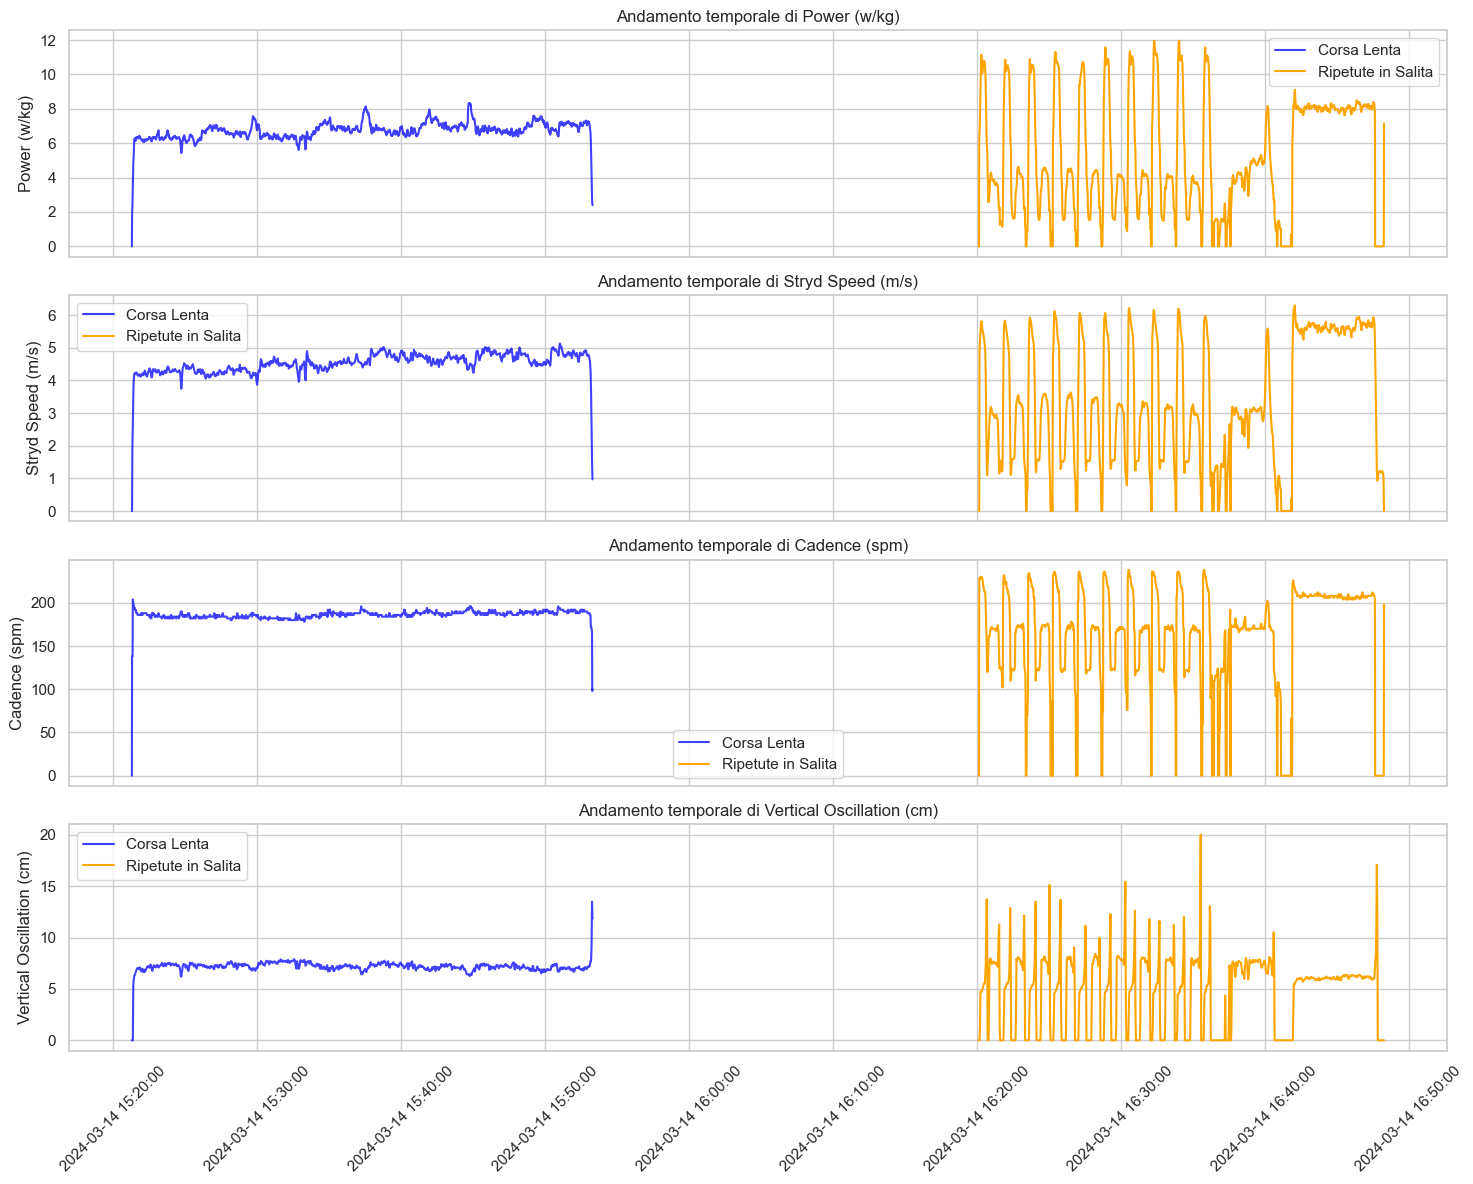

In [15]:
import matplotlib.dates as mdates

# Convertiamo i timestamp UNIX in datetime per la visualizzazione
df_corsa_lenta['Timestamp'] = pd.to_datetime(df_corsa_lenta['Timestamp'], unit='s')
df_ripetute_salita['Timestamp'] = pd.to_datetime(df_ripetute_salita['Timestamp'], unit='s')

# Selezioniamo le variabili per i grafici temporali
temporal_variables = key_variables

# Creiamo i grafici temporali per le variabili selezionate
fig, axes = plt.subplots(len(temporal_variables), 1, figsize=(15, 12), sharex=True)

for i, var in enumerate(temporal_variables):
    # Corsa Lenta
    axes[i].plot(df_corsa_lenta['Timestamp'], df_corsa_lenta[var], label='Corsa Lenta', color='blue', alpha=0.75)
    # Ripetute in Salita
    axes[i].plot(df_ripetute_salita['Timestamp'], df_ripetute_salita[var], label='Ripetute in Salita', color='orange')
    
    axes[i].set_title(f'Andamento temporale di {var}')
    axes[i].set_ylabel(var)
    axes[i].legend()

# Configuriamo il formato dell'asse x per mostrare la data e l'ora
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Pulizia dei dati
Prima di procedere con ulteriori analisi, è essenziale pulire i dataset per rimuovere eventuali outlier o dati non validi che potrebbero influenzare l'analisi di clustering. Questo passaggio include la rimozione o correzione di valori mancanti, errati, o non realistici.

In [7]:
# Verifica della presenza di valori mancanti nei dataset
missing_values_corsa_lenta = df_corsa_lenta.isnull().sum()
missing_values_corsa_lenta

Timestamp                    0
Power (w/kg)                 0
Form Power (w/kg)            0
Air Power (w/kg)             0
Power (w)                    0
Form Power (w)               0
Air Power (w)                0
Watch Speed (m/s)            0
Stryd Speed (m/s)            0
Watch Distance (meters)      0
Stryd Distance (meters)      0
Stiffness                    0
Stiffness/kg                 0
Ground Time (ms)             0
Cadence (spm)                0
Vertical Oscillation (cm)    0
Watch Elevation (m)          0
Stryd Elevation (m)          0
Sessione                     0
dtype: int64

In [8]:
missing_values_ripetute_salita = df_ripetute_salita.isnull().sum()
missing_values_ripetute_salita

Timestamp                    0
Power (w/kg)                 0
Form Power (w/kg)            0
Air Power (w/kg)             0
Power (w)                    0
Form Power (w)               0
Air Power (w)                0
Watch Speed (m/s)            0
Stryd Speed (m/s)            0
Watch Distance (meters)      0
Stryd Distance (meters)      0
Stiffness                    0
Stiffness/kg                 0
Ground Time (ms)             0
Cadence (spm)                0
Vertical Oscillation (cm)    0
Watch Elevation (m)          0
Stryd Elevation (m)          0
Sessione                     0
dtype: int64

# Preparazione dei Dati per il Clustering
Ora che abbiamo verificato che i dati sono completi, il passo successivo è la normalizzazione delle variabili selezionate. La normalizzazione è importante in un'analisi di clustering per assicurare che ogni variabile contribuisca equamente al modello, indipendentemente dalla scala di misura.

Selezioneremo delle variabili chiave, in dettaglio:
- potenza,
- velocità Stryd,
- cadenza,
- e oscillazione verticale

le combineremo in un unico dataframe, rimuoveremo alcuni campioni dal dataset (ad esempio rimuovendo i valori pari a 0, che indicano moementi di recupero) e applicheremo la normalizzazione. 
Successivamente, procederemo con l'analisi di clustering per identificare i gruppi di andamento della corsa.

In [9]:
from sklearn.preprocessing import StandardScaler

# Selezione delle variabili chiave per il clustering
variables_for_clustering = ['Power (w/kg)', 'Stryd Speed (m/s)', 'Cadence (spm)', 'Vertical Oscillation (cm)', 'Sessione']
df_combined = pd.concat([df_corsa_lenta[variables_for_clustering], df_ripetute_salita[variables_for_clustering]])

# Rimozione dei valori dove la cadenza, la velocità Stryd o la potenza sono uguali a zero
df_filtered = df_combined[
    (df_combined['Cadence (spm)'] > 0) & 
    (df_combined['Stryd Speed (m/s)'] > 0) & 
    (df_combined['Power (w/kg)'] > 0)
].copy()

# Normalizzazione dei dati
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_filtered[variables_for_clustering[:4]])

df_normalized[:5]  # Visualizzazione dei primi 5 record normalizzati per conferma


array([[-1.8978789 , -1.85476861, -1.62061419, -2.67506341],
       [-1.63147685, -1.50052907, -1.62061419, -2.67506341],
       [-1.31512443, -1.14628953,  0.82782719, -2.67506341],
       [-0.998772  , -0.73743113,  0.753632  , -1.52344111],
       [-0.64911932, -0.32857274,  0.6794368 , -0.37182305]])

# Analisi di Clustering
Per l'analisi di clustering, utilizzeremo l'algoritmo K-means, un metodo comune per partizionare i dati in k gruppi basati sulla distanza. Un aspetto cruciale di K-means è la scelta del numero di cluster (k). 

Per valutare il numero ottimale di cluster utilizzeremo il **"metodo del gomito"**, analizzando come la varianza totale all'interno dei cluster (Within-Cluster Sum of Square, WCSS) cambia con differenti valori di k.

### Q&A
**Come identifico il numero ottimale di cluster dal grafico "a gomito"?**

*Nel grafico a gomito, il punto in cui la curva assume un angolo a gomito rappresenta il numero ottimale di cluster desiderati.*

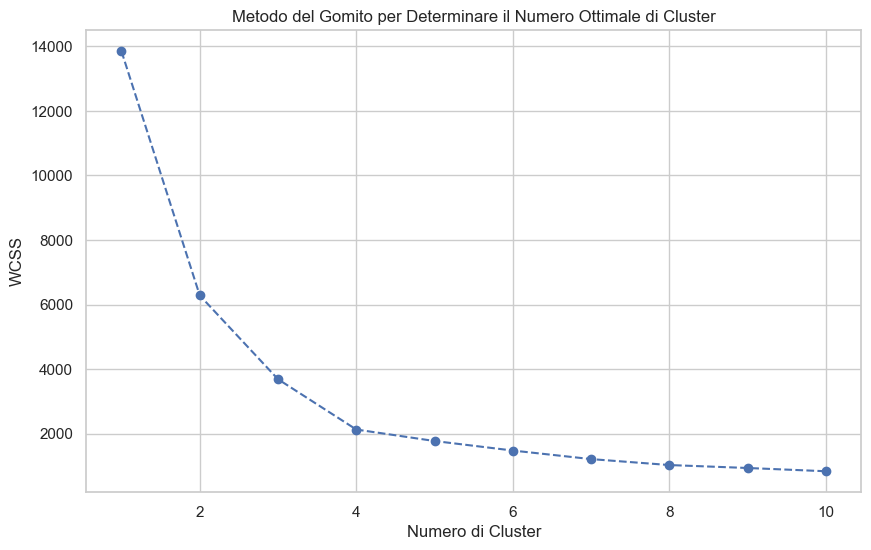

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Calcolo della WCSS per diversi numeri di cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Visualizzazione del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metodo del Gomito per Determinare il Numero Ottimale di Cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS')
plt.show()


Ora abbiamo il grafico del metodo del gomito, che mostra come la **varianza intra-cluster** diminuisce all'aumentare del numero di cluster. Cerchiamo il "punto di gomito" dove l'aumento dei cluster non porta a un significativo decremento della varianza; questo punto suggerisce un numero ottimale di cluster.

Dallo grafico sembra che il punto di gomito possa essere intorno a 3, 4 o 5 cluster. 

Procederemo ora con la creazione del modello di clustering usando 3 cluster e visualizzeremo i cluster risultanti. Dato che abbiamo più di due dimensioni nel nostro dataset, non possiamo visualizzare tutti i cluster in un piano cartesiano bidimensionale. Tuttavia, possiamo visualizzare proiezioni bidimensionali dei cluster lungo due delle principali variabili alla volta.

Creiamo i cluster e poi li visualizziamo in diversi piani cartesiani.

In [11]:
n_clusters=3

In [12]:
# Applichiamo l'algoritmo K-means al dataset normalizzato usando 3 cluster
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized)

# Valutazione del clustering
Per effettuare una valutazione della bontà dell'algoritmo di clustering andiamo a visualizzare come le misurazioni sono state divise nei vari cluster andandole a visualizzare in diversi piani cartesiani.

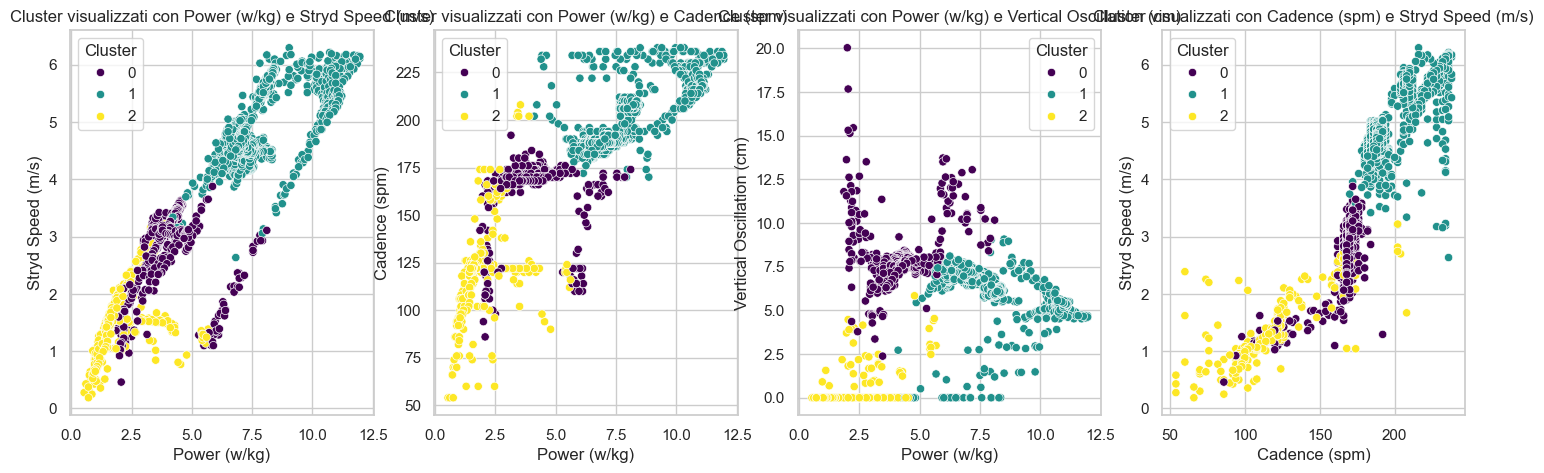

In [13]:
# Aggiungiamo le etichette dei cluster al dataframe per la visualizzazione
df_filtered['Cluster'] = cluster_labels

# Coppie di variabili per i piani cartesiani
variable_pairs = [('Power (w/kg)', 'Stryd Speed (m/s)'), ('Power (w/kg)', 'Cadence (spm)'), ('Power (w/kg)', 'Vertical Oscillation (cm)'), 
                  ('Cadence (spm)', 'Stryd Speed (m/s)')]

# Visualizziamo i cluster in diversi piani cartesiani
fig, axes = plt.subplots(1, len(variable_pairs), figsize=(18, 5))

for ax, (var1, var2) in zip(axes, variable_pairs):
    sns.scatterplot(ax=ax, x=df_filtered[var1], y=df_filtered[var2], hue=df_filtered['Cluster'], palette='viridis')
    ax.set_title(f'Cluster visualizzati con {var1} e {var2}')
    ax.legend(title='Cluster')

plt.show()

Possiamo verificare a quale sessione di allenamento appartengono gli elementi di ciascun cluster, andando a contare le frequenze delle sessioni all'interno di ogni cluster.

Questo ci darà un'idea su come sono distribuite le sessioni di "Corsa Lenta" e "Ripetute in Salita" tra i vari cluster.


In [14]:
# Calcoliamo la distribuzione delle sessioni all'interno di ogni cluster
cluster_distribution = df_filtered.groupby(['Sessione', 'Cluster']).size().unstack(fill_value=0)
cluster_distribution

Cluster,0,1,2
Sessione,,,
Corsa Lenta,7,1909,3
Ripetute in Salita,563,643,337


- Cluster 0: Dominato dalla "Corsa Lenta" con 1908 punti dati, e una presenza minore di "Ripetute in Salita" con 639 punti.
- Cluster 1: Presenta una maggioranza di "Ripetute in Salita" con 559 punti, e pochissimi punti di "Corsa Lenta".
- Cluster 2: Anche qui, "Ripetute in Salita" è rappresentata con 345 punti, e solo 3 punti provengono dalla "Corsa Lenta".

Questi risultati suggeriscono che il clustering ha identificato dei pattern distinguibili nelle diverse sessioni di allenamento. Se il "Cluster 0" è principalmente "Corsa Lenta", potrebbe corrispondere a periodi di riscaldamento o di corsa a ritmo più basso. I "Cluster 1" e "Cluster 2" sembrano riflettere le sessioni di allenamento più intense, come le "Ripetute in Salita", forse differenziandosi in base all'intensità o ad altri aspetti della performance.

# Q&A
- Qual è il numero ottimale di cluster e perchè?
- Che considerazioni si possono fare visualizzando i cluster nei vari piani cartesiani?
- Quali altri piani cartesiani possiamo utilizzare per verificare se i nostri cluster sono ben separati?